## MALIGNANT COMMENTS CLASSIFICATION
### <u>Problem Statement<u>
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 
### <u>Data Set Description<u>
The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   
### The data set includes:
-	`Malignant`: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	`Highly Malignant`: It denotes comments that are highly malignant and hurtful. 
-	`Rude`: It denotes comments that are very rude and offensive.
-	`Threat`: It contains indication of the comments that are giving any threat to someone. 	
-	`Abuse`: It is for comments that are abusive in nature. 
-	`Loathe`: It describes the comments which are hateful and loathing in nature.  
-	`ID`: It includes unique Ids associated with each comment text given.   
-	`Comment text`: This column contains the comments extracted from various social media platforms. 

### Importing Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,plot_roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [2]:
train=pd.read_csv('train.csv')
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
test=pd.read_csv('test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


### EDA

#### 1- Train data

In [4]:
train.shape

(159571, 8)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In Train data we have 8 columns and 159571 rows 
And except Id and comment_text (Object) all other column hsving int64 dtype

In [6]:
test.shape

(153164, 2)

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In Test dataset we have 2 column and 153164 rows

### Descrptive statistics

In [8]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
test.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
freq,1,1


## Checking for null values

In [10]:
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [11]:
test.isnull().sum()

id              0
comment_text    0
dtype: int64

### Checking Null values in heatmap

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64


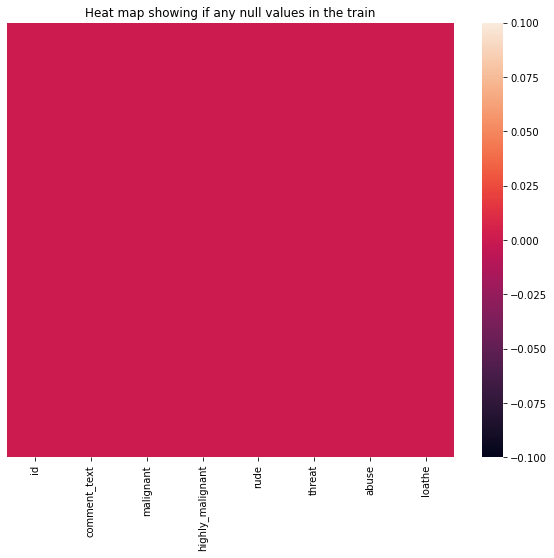

In [12]:
print(train.isnull().sum())

plt.figure(figsize=(10,8),facecolor='white')
sns.heatmap(train.isnull(),yticklabels=False)
plt.title('Heat map showing if any null values in the train')
plt.show()

There are no null values in the dataset.

### Let us visualise the attributes and understand how the data is spread.

In [13]:
#getting the unique values for all features, and getting the unique values of categorical variables
for col in train:
    print(col,':\n',train[col].value_counts())
    print('*****************************************')

id :
 0000997932d777bf    1
392f4a9354209ec6    1
3925db56b320ccc6    1
392753482da03615    1
3927dd49d646f41f    1
                   ..
8e30b2de937e8de9    1
8e30fd3564ba0b4a    1
8e328798f6397fcc    1
8e34742563534edd    1
fff46fc426af1f9a    1
Name: id, Length: 159571, dtype: int64
*****************************************
comment_text :
 Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27                                                                                                                                                                                                                                                                                                                                                                                                      

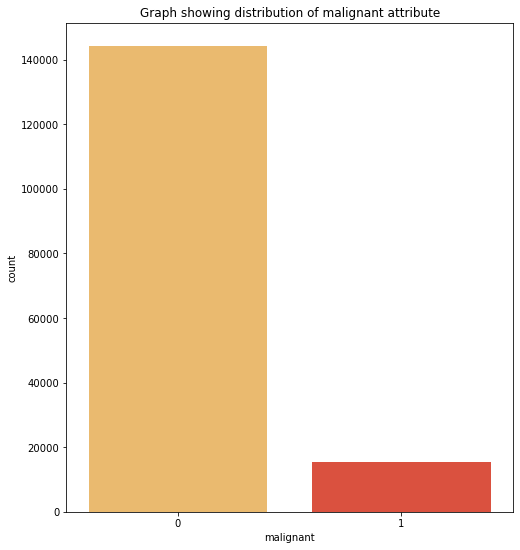

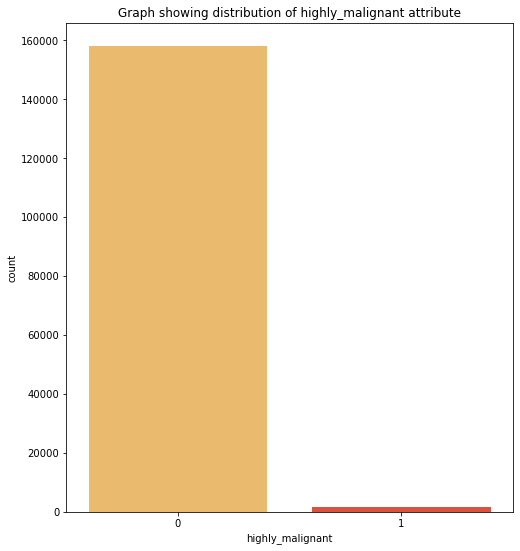

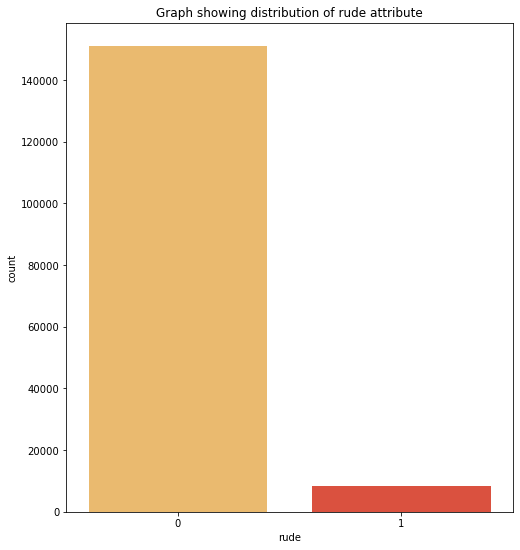

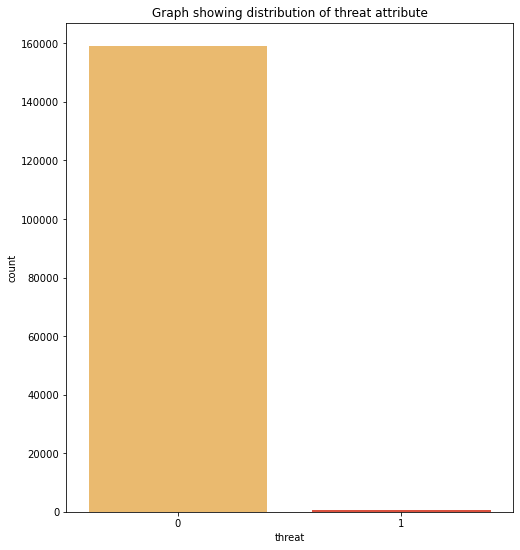

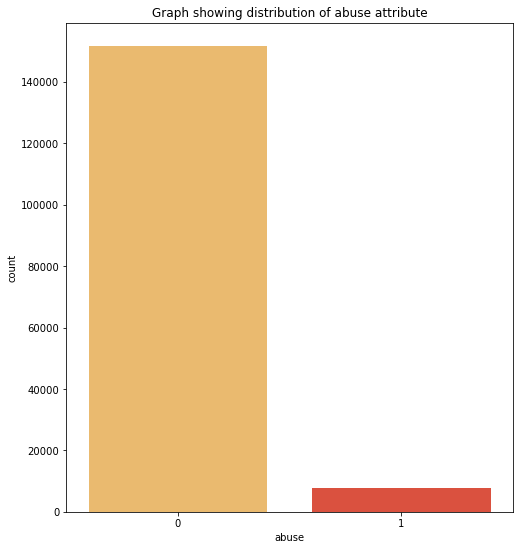

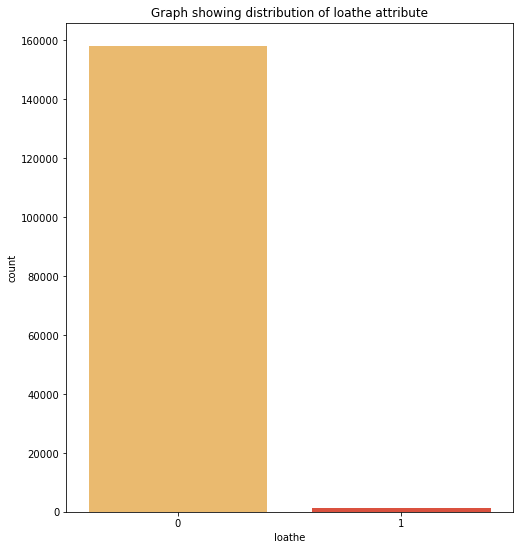

In [14]:
col = ['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']

for i in col:
    if train[i].dtype != 'object':
        plt.figure(figsize=(8,9))
        sns.countplot(train[i],palette='YlOrRd')
        plt.title('Graph showing distribution of {} attribute'.format(i))

### Around 80% of the comments are having normal texts where as 15-20% have toxic comments

## Feature Engineering:
### Let us add another columns which indicates normal text and drop the unwanted column.

In [15]:
#creating a column called 'normal_comment'
col = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

train['normal_comment'] = 1- train[col].max(axis=1)

In [16]:
train.drop(columns=['id'],inplace=True,axis=1) 

train['Row Length']=train['comment_text'].str.len()

1    143346
0     16225
Name: normal_comment, dtype: int64


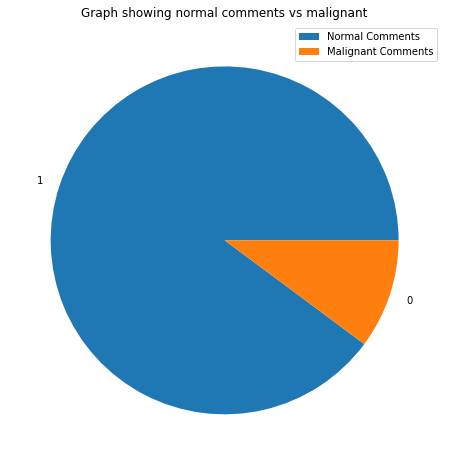

In [17]:
print(train['normal_comment'].value_counts())

plt.figure(figsize=(8,8),facecolor='white')
plt.pie(train['normal_comment'].value_counts(),labels=[1,0]) 
plt.title('Graph showing normal comments vs malignant')
plt.legend(['Normal Comments','Malignant Comments'])
plt.show()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64


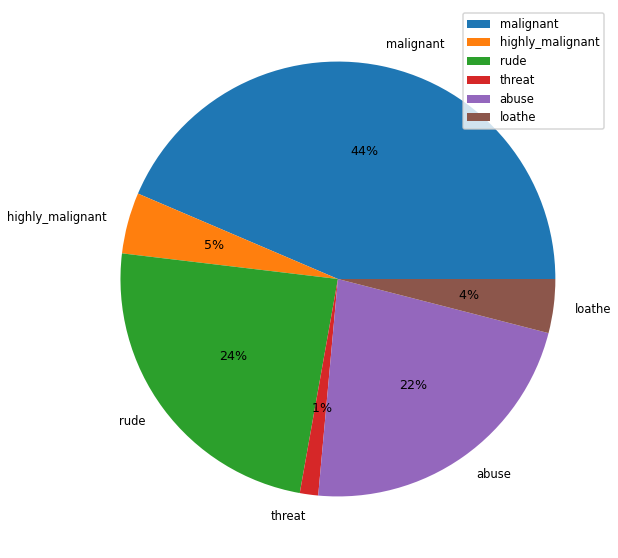

In [18]:
print(train[col].sum())
plt.figure(figsize=(10,10),facecolor='white')
sns.set_context('talk',font_scale=0.7)
plt.pie(train[col].sum(),labels=col,autopct='%2.0f%%',)
plt.legend(col)
plt.show()

## There are 50% of rude and abuse comments.

## Let us check correlation between the attributes

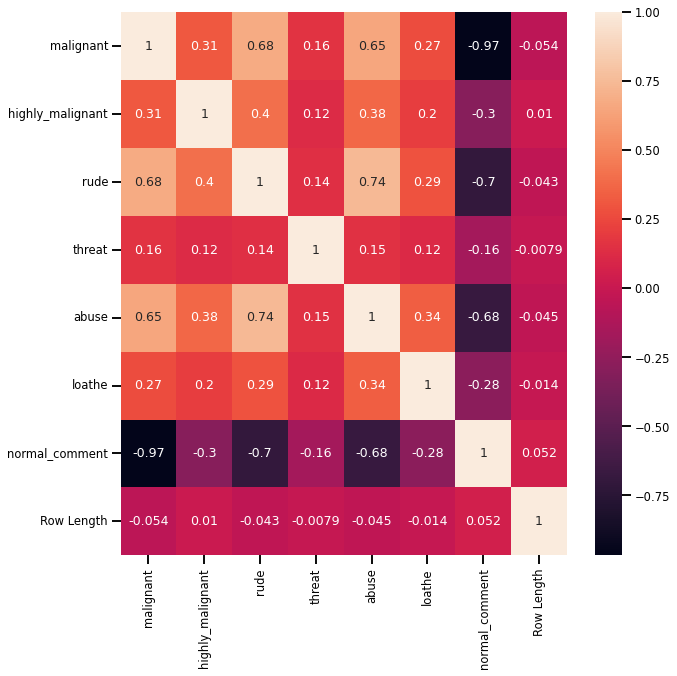

In [19]:
plt.figure(figsize=(10,10),facecolor='white')
sns.heatmap(train.corr(),annot=True)

plt.show()

## We can see that normal and malignant comments are negatively correlated
## Rude and abuse comments have nearly similarities hence more correlated

In [20]:
# checking the skewness for the features:
train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
normal_comment      -2.635944
Row Length           4.121676
dtype: float64

### Let us check for stop words in the dataset and try to remove these words from the comment_text so that we can focus on exact words which are responsible for classifying the comment as malignant.

In [21]:
import nltk
from nltk.corpus import  stopwords
import string

In [22]:
# Convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()

# Replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

## Let us check the length of comments after cleaning the stop words

In [23]:
train['clean_length'] = train.comment_text.str.len()
train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,normal_comment,Row Length,clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,1,264,181
1,d'aww! matches background colour i'm seemingly...,0,0,0,0,0,0,1,112,113
2,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,1,233,149
3,can't make real suggestions improvement wonder...,0,0,0,0,0,0,1,622,404
4,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,1,67,47


In [24]:
# Total length removal
print ('Original Length', train['Row Length'].sum())
print ('Clean Length', train.clean_length.sum())

Original Length 62893130
Clean Length 43973223


In [25]:
train.shape

(159571, 10)

In [26]:
test.shape

(153164, 2)

In [27]:
#Let us convert the numerical columns into categorical column

col = ['malignant','highly_malignant','rude','threat','abuse','loathe']
target_data = train[col]

train['bad'] =train[col].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


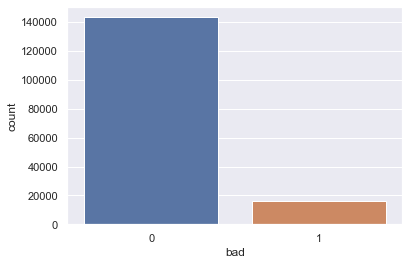

In [28]:
sns.set()
sns.countplot(x="bad" , data = train)
plt.show()

## Model Building

### Let us split the independent and target variables

In [29]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

In [30]:
#dropping the id column from test dataset and converting the text into vectors

test.drop('id',axis=1,inplace=True)

test_data =tf_vec.fit_transform(test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [31]:
y=train['bad']
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

## Logistic Regression

In [33]:
Log_reg = LogisticRegression()
Log_reg.fit(X_train, y_train)
y_pred = Log_reg.predict(X_test)

print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))
print("\n The ROC AUC score of Model :", roc_auc_score(y_test,y_pred))


CV=cross_val_score(Log_reg,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))

      
print("*******************************************")


 The accuracy score of Model : 0.955276570855615

 The ROC AUC score of Model : 0.802294632116666

 The CV score of Model : 0.9541804391779747

 The confusion Matrix :
  [[42730   220]
 [ 1921  3001]]

 The classification report:
                precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872

*******************************************


### Random forest

In [34]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test) 
print("******************RESULTS******************")
print("\n The accuracy score of train Model :", accuracy_score(y_train,y_pred_train)) 

print("\n The accuracy score test of Model :", accuracy_score(y_test,y_pred)) 
print("\n The ROC AUC score of Model :", roc_auc_score(y_test,y_pred))

CV=cross_val_score(rf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of train Model : 0.9988719684151156

 The accuracy score test of Model : 0.9564463569518716

 The ROC AUC score of Model : 0.8365853389713052

 The CV score of Model : 0.9562216373458815

 The confusion Matrix :
  [[42412   538]
 [ 1547  3375]]

 The classification report:
                precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.69      0.76      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.84      0.87     47872
weighted avg       0.95      0.96      0.95     47872

*******************************************


## KNN 

In [35]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

y_pred_train = knn_clf.predict(X_train)
y_pred = knn_clf.predict(X_test) 
print("******************RESULTS******************")
print("\n The accuracy score of train Model :", accuracy_score(y_train,y_pred_train)) 

print("\n The accuracy score test of Model :", accuracy_score(y_test,y_pred)) 
print("\n The ROC AUC score of Model :", roc_auc_score(y_test,y_pred))

CV=cross_val_score(knn_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of train Model : 0.9289519154155363

 The accuracy score test of Model : 0.9174883021390374

 The ROC AUC score of Model : 0.6326489653022542

 The CV score of Model : 0.9171970995640825

 The confusion Matrix :
  [[42573   377]
 [ 3573  1349]]

 The classification report:
                precision    recall  f1-score   support

           0       0.92      0.99      0.96     42950
           1       0.78      0.27      0.41      4922

    accuracy                           0.92     47872
   macro avg       0.85      0.63      0.68     47872
weighted avg       0.91      0.92      0.90     47872

*******************************************


## Multinomial NB

In [36]:
mnn_clf = MultinomialNB()
mnn_clf.fit(X_train, y_train)
y_pred_train = mnn_clf.predict(X_train)
y_pred = mnn_clf.predict(X_test) 
print("******************RESULTS******************")
print("\n The accuracy score of train Model :", accuracy_score(y_train,y_pred_train)) 

print("\n The accuracy score test of Model :", accuracy_score(y_test,y_pred)) 
print("\n The ROC AUC score of Model :", roc_auc_score(y_test,y_pred))

CV=cross_val_score(mnn_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of train Model : 0.9513334944807026

 The accuracy score test of Model : 0.9472342914438503

 The ROC AUC score of Model : 0.7588672369286836

 The CV score of Model : 0.9471526225477417

 The confusion Matrix :
  [[42778   172]
 [ 2354  2568]]

 The classification report:
                precision    recall  f1-score   support

           0       0.95      1.00      0.97     42950
           1       0.94      0.52      0.67      4922

    accuracy                           0.95     47872
   macro avg       0.94      0.76      0.82     47872
weighted avg       0.95      0.95      0.94     47872

*******************************************


## Decision Tree

In [37]:
dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_train, y_train)
y_pred_train = dec_clf.predict(X_train)
y_pred = dec_clf.predict(X_test) 
print("******************RESULTS******************")
print("\n The accuracy score of train Model :", accuracy_score(y_train,y_pred_train)) 

print("\n The accuracy score test of Model :", accuracy_score(y_test,y_pred)) 
print("\n The ROC AUC score of Model :", roc_auc_score(y_test,y_pred))

CV=cross_val_score(dec_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of train Model : 0.9988719684151156

 The accuracy score test of Model : 0.9403617981283422

 The ROC AUC score of Model : 0.8283409736712268

 The CV score of Model : 0.940312821922053

 The confusion Matrix :
  [[41634  1316]
 [ 1539  3383]]

 The classification report:
                precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.72      0.69      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.84     47872
weighted avg       0.94      0.94      0.94     47872

*******************************************


## Gradient boosting

In [38]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred_train = gb_clf.predict(X_train)
y_pred = gb_clf.predict(X_test) 
print("******************RESULTS******************")
print("\n The accuracy score of train Model :", accuracy_score(y_train,y_pred_train)) 

print("\n The accuracy score test of Model :", accuracy_score(y_test,y_pred)) 
print("\n The ROC AUC score of Model :", roc_auc_score(y_test,y_pred))

CV=cross_val_score(gb_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of train Model : 0.9423450523281318

 The accuracy score test of Model : 0.9383773395721925

 The ROC AUC score of Model : 0.7127372434897083

 The CV score of Model : 0.9403754921869462

 The confusion Matrix :
  [[42812   138]
 [ 2812  2110]]

 The classification report:
                precision    recall  f1-score   support

           0       0.94      1.00      0.97     42950
           1       0.94      0.43      0.59      4922

    accuracy                           0.94     47872
   macro avg       0.94      0.71      0.78     47872
weighted avg       0.94      0.94      0.93     47872

*******************************************


## Adaboost Classifier

In [39]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
y_pred_train = ada_clf.predict(X_train)
y_pred = ada_clf.predict(X_test) 
print("******************RESULTS******************")
print("\n The accuracy score of train Model :", accuracy_score(y_train,y_pred_train)) 

print("\n The accuracy score test of Model :", accuracy_score(y_test,y_pred)) 
print("\n The ROC AUC score of Model :", roc_auc_score(y_test,y_pred))

CV=cross_val_score(ada_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of train Model : 0.9464990734026267

 The accuracy score test of Model : 0.945040942513369

 The ROC AUC score of Model : 0.765919666944024

 The CV score of Model : 0.9459440204839058

 The confusion Matrix :
  [[42581   369]
 [ 2262  2660]]

 The classification report:
                precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.88      0.54      0.67      4922

    accuracy                           0.95     47872
   macro avg       0.91      0.77      0.82     47872
weighted avg       0.94      0.95      0.94     47872

*******************************************


## SVC

In [40]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
y_pred_train = svc_clf.predict(X_train)
y_pred = svc_clf.predict(X_test) 
print("******************RESULTS******************")
print("\n The accuracy score of train Model :", accuracy_score(y_train,y_pred_train)) 

print("\n The accuracy score test of Model :", accuracy_score(y_test,y_pred)) 
print("\n The ROC AUC score of Model :", roc_auc_score(y_test,y_pred))

CV=cross_val_score(svc_clf,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of train Model : 0.9804384998970448

 The accuracy score test of Model : 0.9565299131016043

 The ROC AUC score of Model : 0.810908127203466

 The CV score of Model : 0.9561142099342262

 The confusion Matrix :
  [[42702   248]
 [ 1833  3089]]

 The classification report:
                precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.63      0.75      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.81      0.86     47872
weighted avg       0.96      0.96      0.95     47872

*******************************************


<Figure size 1080x1080 with 0 Axes>

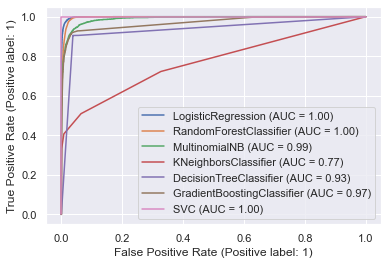

In [42]:
plt.figure(figsize=(15,15), facecolor='white')
show = plot_roc_curve(Log_reg,X_test, y_pred)
plot_roc_curve(rf,X_test, y_pred,ax=show.ax_)
plot_roc_curve(mnn_clf,X_test, y_pred,ax=show.ax_)
plot_roc_curve(knn_clf,X_test, y_pred,ax=show.ax_)
plot_roc_curve(dec_clf,X_test, y_pred,ax=show.ax_)
plot_roc_curve(gb_clf,X_test, y_pred,ax=show.ax_) 
plot_roc_curve(svc_clf,X_test, y_pred,ax=show.ax_) 
plt.show()

## Saving the BEST MODEL

We can see from the ROC curve that, SVC is giving the highest area which proves that it is the best model.

In [44]:
import pickle

file = open('Malignant Comments classifier.pkl', 'wb')
pickle.dump(svc_clf, file)